In [1]:
import pyNetLogo
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
jvm_filepath = r"C:\Program Files\NetLogo 6.2.2\runtime\bin\server\jvm.dll"
netlogo_home_path = r"C:\Program Files\NetLogo 6.2.2"
netlogo = pyNetLogo.NetLogoLink(gui=True, jvm_home=jvm_filepath, netlogo_home=netlogo_home_path)

In [3]:
nl_filepath = "search model.nlogo"
netlogo.load_model(nl_filepath)

In [97]:
class ModelExperiment:
    def __init__(self, netlogo, model_name):
        self.netlogo: pyNetLogo.NetLogoLink = netlogo
        self.setup()
        self.u_rate = pd.DataFrame()
        self.name = model_name
        
    def setup(self):
        self.netlogo.command('setup')

    def set(self, param, value):
        self.netlogo.command(f"set {param} {value}")
        return self

    def get(self, param, n_run=None):
        if n_run is None:
            return self.netlogo.report(param)
        else:
            return self.netlogo.repeat_report(param, n_run)

    def setmode(self, mode:str):
        if mode == "many small":
            self.set("firm_size_list", '"[1 2 5 10]"')
        elif mode == "some big":
            self.set("firm_size_list", '"[40 50 60]"')
        elif mode == "heterogenous":
            self.set("firm_size_list", '"[1 2 5 10 20 40 50 90 100]"')
        else :
            raise Exception("Mode not allowed")
        return self
    
    def concat_ts(self, ts):
        self.u_rate = pd.concat([self.u_rate, ts], axis = 0)

    def get_unemployments(self, n_run):
        return self.get(["unemployment_rate"], n_run)

    def monte_carlo(self, n_sim=100, n_run=200):
        for i in tqdm(range(n_sim)):
            self.setup()
            u_rate_this_sim : pd.DataFrame = self.get_unemployments(n_run) 
            u_rate_this_sim.index.name = "Time"
            u_rate_this_sim.reset_index()
            u_rate_this_sim['Simulation No.'] = i
            u_rate_this_sim['Model Name'] = self.name
            self.concat_ts(u_rate_this_sim)
        return self.u_rate

    def plot_unemployment_ts(self):
        fig, axs = plt.subplots(1,1)
        axs.set_ylim(0,1)
        sns.lineplot(data = self.u_rate, x = "Time", y = 'unemployment_rate', ax=axs)
        fig.tight_layout()
        # return fig
        

In [94]:
me1 = ModelExperiment(netlogo, "Heterogeneous Firms").setmode("heterogenous")
me1_data = me1.monte_carlo(10, 300)

me2 = ModelExperiment(netlogo, "Many Small Firms").setmode("many small")
me2_data = me2.monte_carlo(10, 300)

me3 = ModelExperiment(netlogo, "Some Big Firms").setmode("some big")
me3_data = me3.monte_carlo(10, 300)

all_data = pd.concat([me1_data, me2_data, me3_data])

100%|██████████| 10/10 [00:31<00:00,  3.14s/it]


<AxesSubplot:xlabel='Time', ylabel='unemployment_rate'>

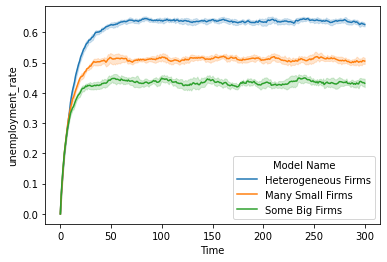

In [95]:
sns.lineplot(data = all_data.reset_index(), x = "Time", y = 'unemployment_rate', hue='Model Name')


In [102]:
df = pd.DataFrame()
for m in range(5):
    wage_accept_lower_bound = 2 * m # 0 ~ 10 %
    print(wage_accept_lower_bound, "%")
    me = ( ModelExperiment(netlogo, f"Wage Rigidity: {wage_accept_lower_bound / 100 :.2f}")
            .setmode("heterogenous")
            .set("wage-lower-%", wage_accept_lower_bound)
        ) 
    me_data = me.monte_carlo(10, 300)
    df = pd.concat([df, me_data])

0 %


100%|██████████| 10/10 [00:30<00:00,  3.04s/it]


2 %


100%|██████████| 10/10 [00:29<00:00,  2.94s/it]


4 %


100%|██████████| 10/10 [00:28<00:00,  2.86s/it]


6 %


100%|██████████| 10/10 [00:27<00:00,  2.79s/it]


8 %


100%|██████████| 10/10 [00:27<00:00,  2.72s/it]


<AxesSubplot:xlabel='Time', ylabel='unemployment_rate'>

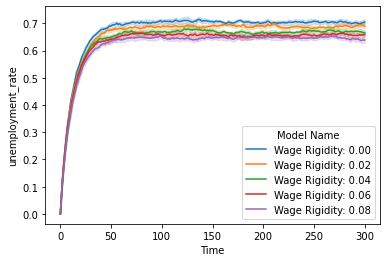

In [103]:
sns.lineplot(data = df.reset_index(), x = "Time", y = 'unemployment_rate', hue='Model Name')


0.5 %


100%|██████████| 10/10 [00:27<00:00,  2.70s/it]


1.0 %


100%|██████████| 10/10 [00:26<00:00,  2.65s/it]


1.5 %


100%|██████████| 10/10 [00:25<00:00,  2.57s/it]


2.0 %


100%|██████████| 10/10 [00:25<00:00,  2.52s/it]


<AxesSubplot:xlabel='Time', ylabel='unemployment_rate'>

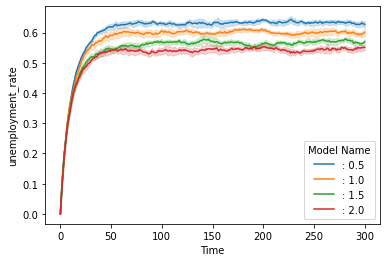

In [104]:
df_wander = pd.DataFrame()
for m in range(4):
    wander_speed = 0.5*(m+1)
    print(wander_speed, "%")
    me = ( ModelExperiment(netlogo, f": {wander_speed}")
            .setmode("heterogenous")
            .set("wander_speed", wander_speed)
        ) 
    me_data = me.monte_carlo(10, 300)
    df_wander = pd.concat([df_wander, me_data])
sns.lineplot(data = df_wander.reset_index(), x = "Time", y = 'unemployment_rate', hue='Model Name')
